<a href="https://colab.research.google.com/github/TutuBraz/netflix_content_based_recommender/blob/main/netflix_content_based_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix TV Shows and Movies
### Movies and TV Shows listings on Netflix (July, 2022)

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

Tasks:


1.   Developing a content-based recommender system using the genres and/or descriptions.
2.   Identifying the main content available on the streaming.
3.   Network analysis on the cast of the titles.
4. Exploratory data analysis to find interesting insights.







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_titles = pd.read_csv('/content/titles.csv')


# Compreendendo o dataframe

In [ ]:
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [ ]:
df_titles.shape

(5850, 15)

In [ ]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [ ]:
#Retirando colunas que não serão usadas
#Retirando valores não essenciais para análise
df_titles.drop(['id','imdb_id','imdb_votes','tmdb_popularity', 'imdb_score','tmdb_score', 'seasons'], axis=1, inplace=True)
df_titles.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US']
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US']
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US']
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB']
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']"


In [ ]:
df_titles.shape

(5850, 8)

In [ ]:
#tipo de conteúdo
set(df_titles.type)

{'MOVIE', 'SHOW'}

In [ ]:
#Classificação indicativa
set(df_titles.age_certification)

{'G',
 'NC-17',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 nan}

In [ ]:
#genêro dos filmes
set(df_titles.genres)

{"['thriller', 'horror', 'drama', 'comedy', 'crime']",
 "['animation', 'action', 'scifi', 'drama', 'fantasy', 'horror']",
 "['action', 'fantasy', 'horror', 'western', 'family', 'scifi']",
 "['family']",
 "['scifi', 'animation', 'action', 'drama', 'romance']",
 "['drama', 'animation']",
 "['documentation', 'music', 'comedy', 'history']",
 "['fantasy', 'action', 'thriller']",
 "['crime', 'fantasy', 'thriller', 'drama', 'action']",
 "['horror', 'fantasy', 'thriller']",
 "['comedy', 'family', 'fantasy', 'scifi', 'animation']",
 "['fantasy', 'action', 'family', 'comedy', 'drama', 'european']",
 "['romance', 'sport', 'comedy', 'drama']",
 "['history', 'drama', 'action', 'thriller', 'comedy', 'documentation']",
 "['action', 'scifi', 'family', 'comedy', 'drama']",
 "['horror', 'thriller', 'fantasy']",
 "['comedy', 'family', 'animation', 'drama', 'horror', 'thriller']",
 "['drama', 'fantasy', 'animation', 'action', 'romance', 'horror']",
 "['drama', 'family', 'comedy', 'romance']",
 "['action',

Na categoria genres observa-se títulos com mais de um tipo de gênero.

In [ ]:
#países que produziram
set(df_titles.production_countries)

{"['AE', 'FR', 'JO', 'LB', 'QA', 'PS']",
 "['AE', 'LB']",
 "['AE', 'US']",
 "['AE']",
 "['AF', 'DE', 'PS']",
 "['AF']",
 "['AR', 'CL']",
 "['AR', 'CO']",
 "['AR', 'DE', 'UY', 'ES']",
 "['AR', 'ES', 'UY']",
 "['AR', 'ES']",
 "['AR', 'FR']",
 "['AR', 'IT']",
 "['AR', 'PE']",
 "['AR', 'US']",
 "['AR']",
 "['AT', 'DE']",
 "['AT', 'GB', 'US']",
 "['AT', 'IQ', 'US']",
 "['AT', 'US']",
 "['AT']",
 "['AU', 'CH', 'GB']",
 "['AU', 'DE', 'GB', 'US']",
 "['AU', 'FR', 'DE']",
 "['AU', 'GB']",
 "['AU', 'US', 'CN']",
 "['AU', 'US']",
 "['AU']",
 "['BD', 'IN']",
 "['BD']",
 "['BE', 'DE']",
 "['BE', 'DK', 'DE', 'GB', 'US']",
 "['BE', 'FR', 'ES', 'CH', 'PS']",
 "['BE', 'FR', 'IT', 'LB']",
 "['BE', 'FR', 'IT']",
 "['BE', 'FR', 'SN']",
 "['BE', 'FR']",
 "['BE', 'GB', 'DE']",
 "['BE', 'LT', 'NL']",
 "['BE', 'LU']",
 "['BE', 'NL']",
 "['BE', 'SE', 'GB']",
 "['BE', 'US']",
 "['BE']",
 "['BG', 'US']",
 "['BG']",
 "['BR', 'DE', 'QA', 'MX', 'US', 'CH', 'AR']",
 "['BR', 'DK', 'FR', 'DE', 'PL', 'AR']",
 "['BR', '

A mesma complicação que se encontra na colunas de gêneros, se encontra na coluna de país de produção

In [ ]:
#Identificando duplicatas
df_titles.duplicated().any()

False

# Tratando valores do dataframe

In [ ]:
def corrige_valores(conteudo):
  '''Esta função separa e seleciona valores que estão dentro de uma lista e pertencem a uma coluna'''
  from random import choice
  
  gen = str(conteudo)[1:-1].split()
  for i in range(len(gen)):
    gen[i] = gen[i].strip()
    gen[i][1:-1]
    
    if len(gen) == 0:
      return None
    
    elif len(gen) == 1:
      return gen[0][1:-1]

    else:
      title=choice(gen)
      if title == gen[-1]:
        return title[1:-1]
      else: 
        return title[1:-2]
          

## Tratando valores da coluna genres

In [ ]:
df_titles.genres.value_counts()

['comedy']                                                       484
['documentation']                                                329
['drama']                                                        328
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: genres, Length: 1726, dtype: int64

In [ ]:
generos = df_titles.genres.apply(corrige_valores)
main_genre = pd.DataFrame(generos)
main_genre.head()

,genres
0,documentation
1,crime
2,thriller
3,fantasy
4,action


In [ ]:
df_titles.genres = main_genre
df_titles

,title,type,description,release_year,age_certification,runtime,genres,production_countries
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,['US']
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,['US']
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,thriller,['US']
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,['GB']
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,action,"['GB', 'US']"
...,...,...,...,...,...,...,...,...
5845,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,drama,['NG']
5846,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,drama,[]
5847,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,comedy,['CO']
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,None,['US']


In [ ]:
df_titles.genres.value_counts()

drama            1213
comedy           1118
documentation     577
thriller          384
romance           349
action            323
crime             306
family            231
animation         227
reality           162
fantasy           159
european          149
scifi             143
horror            118
music             111
history            78
sport              70
war                59
western            14
Name: genres, dtype: int64

## Tratando valores da coluna producton_countries

In [ ]:
paises = df_titles.production_countries.apply(corrige_valores)
paises=pd.DataFrame(paises)
df_titles.production_countries = paises
df_titles.head()

,title,type,description,release_year,age_certification,runtime,genres,production_countries
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,crime,US
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,thriller,US
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,fantasy,GB
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,action,GB


In [ ]:
df_titles.production_countries.value_counts()

US    2123
IN     607
GB     301
JP     272
KR     226
      ... 
AL       1
DZ       1
RS       1
IR       1
FO       1
Name: production_countries, Length: 98, dtype: int64

## Tratando de valores vazios

In [ ]:
#Verificando valores vazios
df_titles.isnull().sum().sort_values(ascending=False)

age_certification       2619
production_countries     229
genres                    59
description               18
title                      1
type                       0
release_year               0
runtime                    0
dtype: int64

In [ ]:
titles_clean = df_titles[df_titles.description.isnull()]

,title,type,description,release_year,age_certification,runtime,genres,production_countries
1111,幸福料理,SHOW,NaN,2014,TV-14,44,None,None
1114,Grandmother's Farm,MOVIE,NaN,2013,NaN,71,horror,None
1704,NaN,MOVIE,NaN,2015,NaN,11,None,None
2105,Camarón Revolution,SHOW,NaN,2018,TV-14,52,documentation,ES
2189,Beyblade Burst Turbo,SHOW,NaN,2018,TV-Y7,22,scifi,JP
2485,RIDE ON TIME,SHOW,NaN,2018,TV-PG,22,None,JP
2754,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018,TV-PG,40,reality,None
2798,The Birth Reborn 2,MOVIE,NaN,2018,PG,91,documentation,BR
3700,Beyblade Burst Surge,SHOW,NaN,2020,TV-Y,23,animation,JP
4110,ปริศนาล่าข้ามเวลา,SHOW,NaN,2019,TV-14,60,None,TH


# Análise.

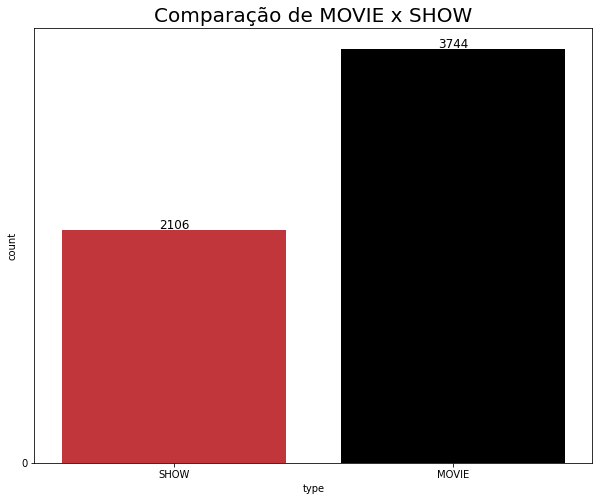

In [ ]:
#Verificando a distribuição dos filmes e das séries

#Cores netflix
netflix_palette = ["#D81F26", "#000000"]

#Tamanho da figura
plt.figure(figsize=(10,8))

#o tipo de gráfico
ax = sns.countplot(data=df_titles, x='type', palette=sns.set_palette(netflix_palette))

#Colocando rótulo nas barras
for i in ax.patches:
    ax.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
#Retirando valores do eixo y
plt.yticks([0])

#titúlo do gráfico
ax.set_title("Comparação de MOVIE x SHOW", fontsize=20)
plt.show()

Nota-se que a uma maior quantidade filmes do que de séries na plataforma.

Informação que quero obter:

*   Distribuição dos conteúdos em relação ao ano de lançamento.
*   Gêneros mais presentes.
*   Países que produzem mais conteúdos.
*   A duração dos conteúdos mudam conforme o passar dos anos?
*   Existe correlação entre o imdb_score e tmdb_score?
*   Existe um correlação entre genêro e nota no imdb?
  


## Distribuição dos conteúos em relação ao ano de lançamento.

In [ ]:
#Agrupamento das colunas 
grp_release_year = df_titles[['release_year', 'type', 'id']].groupby(['release_year', 'type']).count().sort_values(by='release_year', ascending=True)

#Pivotando o dataframe
pivot_release_year = grp_release_year.pivot_table(index ='release_year', columns='type', values='id')
pivot_release_year

KeyError: ignored

In [ ]:
#Plot da distribuição de contúdos da netflix com base no ano de lançamento
ax=pivot_release_year.plot(kind='bar', fontsize=12, figsize=(20,8),ylabel='ID',color=netflix_palette)
ax.set_title('Filme e programas da Netflix pelo ano de laçamento', fontsize=20);


Pode-se observar que a maioria dos conteúdos disponibilizados pela netflix até dia 22 julho de 2022, tem suas datas de produção mais recente.

In [ ]:
#Plot
ax=pivot_release_year[(pivot_release_year.MOVIE >  10) | (pivot_release_year.SHOW > 10)].plot(kind='bar', fontsize=12, figsize=(20,8), ylabel='ID', color=netflix_palette)

#Título
ax.set_title('Filme e programas da Netflix pelo ano de laçamento (2006-2022)', fontsize=20)

#Eixo y
ax.set_ylabel('Quantidade', fontsize=10)
#Eixo x
ax.set_xlabel('Ano de lançamento', fontsize=10)

#Retidando a margem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#Colocando rótulo nas barras
for i in ax.patches:
    ax.annotate("%.0f" % i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
#Retirando valores do eixo y
plt.yticks([0]);

Existe uma crescente na quantidade de conteúdos disponibilizado pela plataformar, em especial no período de 2009 a 2018. E uma constância na quantidade dos conteúdos lançados entre 2018 a 2021, a tendência é que disponibilize uma quantidade parecida para o ano de 2022, lembrandando que os dados são referentes até julho de 2022.

##Distribuição de gêneros.

In [ ]:
df_titles

In [ ]:
grp_genres = df_titles[['title','type','genres']].groupby(['type', 'genres']).count()
pivot_grp_genres = grp_genres.pivot_table(values='title', columns='type', index='genres').sort_values(by='MOVIE', ascending=True)
pivot_grp_genres

In [ ]:
ax = pivot_grp_genres.plot(kind='bar', fontsize=12, figsize=(20,8), ylabel='ID', color=netflix_palette)
ax.set_title('Distribuição de gêneros de filmes e série da Netflix (Até 22 de julho de 2022).', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_xlabel('Genêro', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in ax.patches:
    ax.annotate("%.0f" % i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
plt.yticks([0]);

Através do gráfico observamos que são poucos os gêneros que existem mais séries do que filmes.

In [ ]:
pivot_grp_genres.isnull().count()

## Países que produzem mais conteúdos.

Para melhor visualização da coluna production_country irei utilizar a mesma técnica que utilizei na para responder o tópico de distribuição de gêneros.

In [ ]:
grp_countries = df_titles[['id','type','production_countries']].groupby(['production_countries','type']).count()
pivot_grp_countries = grp_countries.pivot_table(values = 'id',columns = 'type', index = 'production_countries').sort_values(by='MOVIE', ascending=False)
pivot_grp_countries.head(20)

In [ ]:
pivot_grp_countries.SHOW.sum()

In [ ]:
ax = pivot_grp_countries.head(10).MOVIE.plot(kind='bar', fontsize=12, figsize=(20,8), ylabel='ID', color=sns.color_palette("rocket"))
ax.set_title('Top 10 países com mais filmes disponibilizados na Netflix (Até de julho de 2022).', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_xlabel('Genêro', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in ax.patches:
    ax.annotate("%.0f" % i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
plt.yticks([0]);

Na categoria filmes os Estados Unidos dominam a produção de fimes, representando 36% do filmes, e o segundo lugar 15%.

In [ ]:
pivot_grp_countries_SHOW = grp_countries.pivot_table(values = 'id',columns = 'type', index = 'production_countries').sort_values(by='SHOW', ascending=False)

ax = pivot_grp_countries_SHOW.SHOW.head(10).plot(kind='bar', fontsize=12, figsize=(20,8), ylabel='ID', color=sns.color_palette("rocket"))
ax.set_title('Top 10 países com mais séries disponibilizadas na Netflix (Até de julho de 2022).', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_xlabel('Genêro', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

for i in ax.patches:
    ax.annotate("%.0f" % i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12,
                  color='black', xytext=(0, 1),
                  textcoords='offset points'
                  )
plt.yticks([0]);

A predominância de conteúdos norte-americanos se extende também para as séries representando quase 39% das séries, enquanto o segundo representa quase 9%. Nota-see também que o segundo colocado na categoria séries não é o mesmo da categoria filmes.

## A duração dos conteúdos mudam conforme o passar dos anos?

In [ ]:
df_titles.head()

In [ ]:
grp_runtime = df_titles[['release_year', 'type', 'runtime']].groupby(['release_year','type']).mean()
grp_runtime

In [ ]:
pivot_runtime_mean = grp_runtime.pivot_table(values='runtime', columns='type', index='release_year')
pivot_runtime_mean

In [ ]:
ax = pivot_runtime_mean.plot(kind='line', fontsize=12, figsize=(20,8), ylabel='Duração', color=sns.color_palette(netflix_palette))
ax.grid(axis='both', linestyle='dotted')
ax.set_title('Duração média de filmes e séries por ano disnibilizados na Netflix (Até de julho de 2022).', fontsize=20)
#legenda
ax.legend(['Filme', 'Série'])
#título eixo x.
ax.set_xlabel('Ano', fontsize=10)

#Retirando margens
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x='type', y='runtime',  data=df_titles) 

plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x='runtime', hue='type', data=df_titles)
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="release_year",
                    y="runtime",
                hue='type',
                    data=df_titles)